In [13]:
from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.regression_generator import generate_regression
from HW2.sgd import scaled_mini
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels

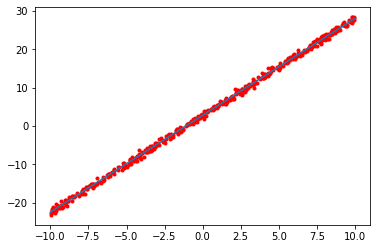

In [14]:
f, points = generate_regression(point_count=500, scale=3, y_scale=0.5)

visualize_regression_point(f, points)

In [15]:
storage = BenchmarkStorage()

# No scale (==1)

[2.53798279 2.79606176]
Benchmark results for config <('mini50-scale1', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.064213
Mean memory:0.0B
Mean SMAPE value:0.03387735312442266
Mean RMSE value:0.5126371329463468
Mean logcosh value:0.11927252375571101
Mean gradient calls:8350.0
Iterations done:167.0


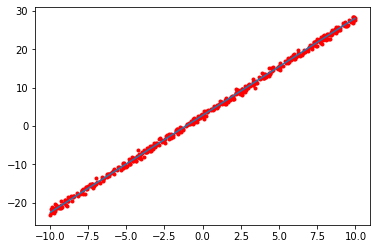

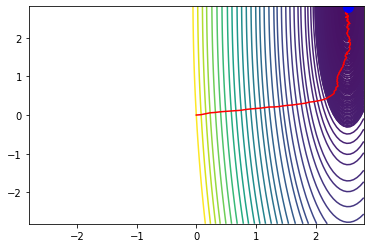

In [16]:
index = storage.add_benchmark_config(batch_size='mini50-scale1')
(ab, meta), ps = scaled_mini(points, batch_size=50, eps=5e-2, scale=1)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, ps)
draw_levels(ps, meta["points"])

# Scale (0.5 $\rightarrow$ 100)

[253.36081208 237.77564155]
Benchmark results for config <('mini50-scale100', 1, Default(no) optimization, Squared error calculator)>:
Mean time:4.16215
Mean memory:0.0B
Mean SMAPE value:0.05125429662558229
Mean RMSE value:67.24914053299871
Mean logcosh value:54.18754070222896
Mean gradient calls:500000.0
Iterations done:10000.0


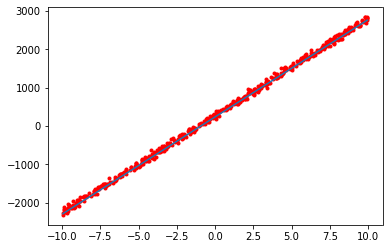

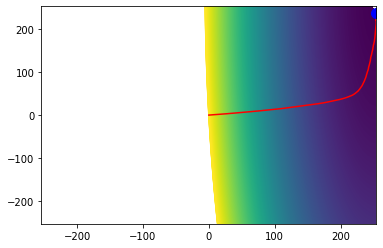

In [17]:
index = storage.add_benchmark_config(batch_size='mini50-scale100')
(ab, meta), ps = scaled_mini(points, batch_size=50, eps=7.5e-3, scale=100)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, ps)
draw_levels(ps, meta["points"])

#### Наблюдения
* Если изначальный разброс маленький, то градиент очень маленький и нам нехватает точности, чтобы прийти в минимум
* Для этого мы уыеличиваем `scale`, чтобы не "перескакивать" минимум
* Чтобы прийти в одну и ту же точку потребуется больше итераций

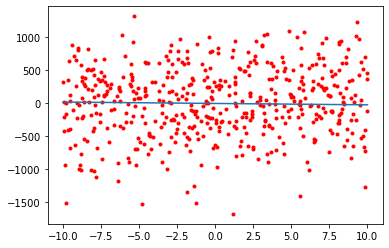

In [18]:
f, points = generate_regression(point_count=500, scale=3, y_scale=500)

visualize_regression_point(f, points)

# Scale (500 $\rightarrow$ 0.01)

[0.06489404 0.03619907]
Benchmark results for config <('mini25-scale0.01', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.018452
Mean memory:0.0B
Mean SMAPE value:0.8968263661883915
Mean RMSE value:5.182750456322877
Mean logcosh value:3.544312970643391
Mean gradient calls:1575.0
Iterations done:63.0


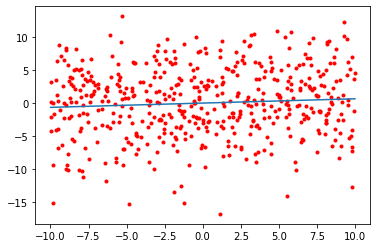

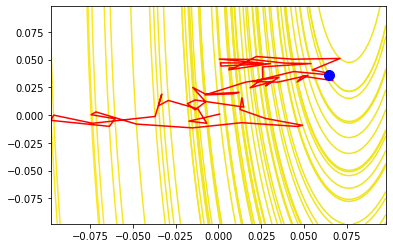

In [23]:
index = storage.add_benchmark_config(batch_size='mini25-scale0.01')
(ab, meta), ps = scaled_mini(points, batch_size=25, eps=1.6e-2, scale=0.01)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, ps)
draw_levels(ps, meta["points"])

#### Наблюдения

* Если разброс слишком большой, то для того, чтобы прийти в минимум, нам может не хватить нашего градиента т.к. минимум находится где-то "далеко"
* Для этого мы уменьшаем `scale` и делаем более "широкии" (в изначальном смысле) шаги
* Соответственно, чтобы прийти в одну и ту же точку, потребуется меньше итераций